In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

from scipy import stats
from scipy.stats import spearmanr
import numpy as np
from scipy.stats import chi2_contingency

In [4]:
bio = pd.read_csv('Agriculture_biologique_final.csv', sep ="\t")
env = pd.read_csv('Impact environnemental_final.csv',sep ="\t", low_memory = False)
qual = pd.read_csv('Qualite nutritionnelle_final.csv',sep ="\t",low_memory = False)

## TEST ?

## Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?



In [4]:
bio
env

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,c,False,False,False
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,e,False,False,False
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,unknown,False,False,False


In [5]:
#description du bio
bio.describe(include = 'all')

,product_name,brands_tags,serving_size,est_bio
count,456563,463922,86178,463922
unique,311711,58298,9267,2
top,Comté,carrefour,serving,False
freq,468,12445,10326,393476


In [6]:
env

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,False
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,c,False,False,False
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,e,False,False,False
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,unknown,False,False,False


In [7]:
env.describe (include = 'all')

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa
count,932866,907007,279260,463922,932866,89842,842701,931887,932866,932866,932866
unique,843234,551132,22829,58298,1812,9708,772312,7,2,2,2
top,3700009201312,Comté,500 g,carrefour,en:france,serving,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
freq,3,1050,12890,12445,877139,10907,35,623341,843861,913093,928320


In [8]:
qual

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
qual.describe (include = 'all')

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
count,932866,907007,279260,463922,932866,89842,842701,259155,319615,6.868430e+05,7.031940e+05,708835.000000,708136.000000,705019.000000,676852.000000,932866.000000
unique,843234,551132,22829,58298,1812,9708,772312,197024,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3700009201312,Comté,500 g,carrefour,en:france,serving,https://images.openfoodfacts.org/images/produc...,"en:superior-quality-durum-wheat-semolina,en:ce...",d,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,1050,12890,12445,877139,10907,35,804,99458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.087141e+12,1.422095e+12,6.118576,13.647225,8.873375,1.316983,0.000487
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.873539e+15,1.192511e+15,471.453727,25.021104,10.083561,12.133253,0.022104
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.867753e+18,0.000000e+00,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000e+02,1.000000e+00,0.200000,0.600000,1.500000,0.060000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.630000e+02,8.000000e+00,2.000000,3.400000,6.200000,0.530000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+02,2.200000e+01,8.000000,19.200000,13.000000,1.300000,0.000000


In [10]:
qual

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
envbio

NameError: name 'envbio' is not defined

In [ ]:
envbioo = envbio.drop(columns=['quantity','serving_size','code','quantity','image_url'])
envbioo

## Travail sur le nutriscore

### Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?



In [115]:
#Dataframe complet

envbio = pd.merge (bio, env, on = ['product_name', 'brands_tags','serving_size'], how = 'outer', indicator = True)
envbio

,product_name,brands_tags,serving_size,est_bio,code,quantity,countries_tags,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa,_merge
0,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,False,False,both
1,Skyr,danone,NaN,False,04319111,825 g,en:france,https://images.openfoodfacts.org/images/produc...,unknown,True,False,False,both
2,Skyr,danone,NaN,False,1033097270864,4,en:france,NaN,d,False,False,False,both
3,Skyr,danone,NaN,False,3033490004744,NaN,en:france,NaN,unknown,False,False,False,both
4,Skyr,danone,NaN,False,2033496445756,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137063,Cailloux coeur chocolat,NaN,NaN,NaN,9999990060556,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,right_only
2137064,Cailloux Coeur Chocolat,NaN,NaN,NaN,9999990060563,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,right_only
2137065,Pastilles Menthe,NaN,NaN,NaN,9999990060600,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,right_only
2137066,Tartes saveur pommes,NaN,NaN,NaN,9999990415851,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False,right_only


In [116]:
#Dataframe complet
envqualbio = pd.merge(envbio, qual, on = ['code','product_name','quantity','brands_tags','countries_tags', 'serving_size','image_url'], how = 'outer', indicator = 'merged_bio')
envqualbio

,product_name,brands_tags,serving_size,est_bio,code,quantity,countries_tags,image_url,ecoscore_grade,est_plastique,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,merged_bio
0,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
1,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
2,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
3,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
4,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529995,Cailloux coeur chocolat,NaN,NaN,NaN,9999990060556,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,404.0,0.0,0.0,93.0,0.0,0.00,0.0,both
2529996,Cailloux Coeur Chocolat,NaN,NaN,NaN,9999990060563,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
2529997,Pastilles Menthe,NaN,NaN,NaN,9999990060600,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
2529998,Tartes saveur pommes,NaN,NaN,NaN,9999990415851,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,401.0,14.0,6.5,36.0,4.0,0.48,0.0,both


In [123]:
#nombre lignes en double
envqualbio.duplicated().sum()

1680384

In [124]:
#suppression des doublons
envqualbio_sans_doublon = envqualbio.drop_duplicates()
envqualbio_sans_doublon

,product_name,brands_tags,serving_size,est_bio,code,quantity,countries_tags,image_url,ecoscore_grade,est_plastique,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,merged_bio
0,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
6,Skyr,danone,NaN,False,04319111,825 g,en:france,https://images.openfoodfacts.org/images/produc...,unknown,True,...,"en:skimmed-milk,en:dairy,en:milk,fr:ferments-l...",NaN,NaN,0.2,NaN,3.9,10.0,0.09,0.0,both
12,Skyr,danone,NaN,False,1033097270864,4,en:france,NaN,d,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
18,Skyr,danone,NaN,False,3033490004744,NaN,en:france,NaN,unknown,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
42,Skyr,danone,NaN,False,2033496445756,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529995,Cailloux coeur chocolat,NaN,NaN,NaN,9999990060556,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,404.0,0.0,0.0,93.0,0.0,0.00,0.0,both
2529996,Cailloux Coeur Chocolat,NaN,NaN,NaN,9999990060563,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
2529997,Pastilles Menthe,NaN,NaN,NaN,9999990060600,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
2529998,Tartes saveur pommes,NaN,NaN,NaN,9999990415851,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,401.0,14.0,6.5,36.0,4.0,0.48,0.0,both


In [119]:
nombre_lignes_skyr = envqualbio_sans_doublon['product_name'].value_counts()['Skyr']
nombre_lignes_skyr


76

In [125]:
#Les produits les plus représentés
nombre_lignes = envqualbio_sans_doublon['product_name'].value_counts().sort_values(ascending = False)
nombre_lignes

product_name
Filet de poulet                 1197
Comté                           1104
Miel                             805
Filets de poulet                 771
Poulet                           717
                                ... 
Kokosbluten zuker                  1
Paranuss Kerne                     1
Raisin bio sultaninen              1
Abricots bio sucrés                1
Pastilles à l'eau de lourdes       1
Name: count, Length: 551132, dtype: int64

In [126]:
envqualbio_sans_doublon.reset_index().head(10)

,index,product_name,brands_tags,serving_size,est_bio,code,quantity,countries_tags,image_url,ecoscore_grade,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,merged_bio
0,0,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.090,0.0,both
1,6,Skyr,danone,NaN,False,04319111,825 g,en:france,https://images.openfoodfacts.org/images/produc...,unknown,...,"en:skimmed-milk,en:dairy,en:milk,fr:ferments-l...",NaN,NaN,0.2,NaN,3.9,10.0,0.090,0.0,both
2,12,Skyr,danone,NaN,False,1033097270864,4,en:france,NaN,d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
3,18,Skyr,danone,NaN,False,3033490004744,NaN,en:france,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
4,42,Skyr,danone,NaN,False,2033496445756,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.090,0.0,both
5,48,moutarde au moût de raisin,courte-paille,NaN,False,0000000000100,100g,en:france,https://images.openfoodfacts.org/images/produc...,c,...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.2,22.0,5.1,4.600,0.0,both
6,49,Solène céréales poulet,crous,NaN,False,0000000001199,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,...,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",NaN,219.0,5.9,0.5,1.7,9.7,0.464,0.0,both
7,50,Tarte noix de coco,"crous-resto,crous",NaN,False,0000000001281,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,...,NaN,d,381.0,22.0,15.5,21.9,4.6,0.100,0.0,both
8,51,Crème dessert chocolat,ferme-de-la-fremondiere,NaN,False,0000000001663,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,...,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",NaN,0.0,0.0,0.0,0.0,0.0,0.000,0.0,both
9,52,Compote de poire,crous,NaN,False,0000000001885,NaN,en:france,https://images.openfoodfacts.org/images/produc...,b,...,NaN,a,157.0,0.0,0.0,27.0,0.6,0.000,0.0,both


In [129]:
envqualbio_sans_doublon.isnull().sum() / envqualbio_sans_doublon.shape[0] *100

product_name           2.866471
brands_tags           48.497792
serving_size          89.848708
est_bio               48.497792
code                   0.000000
quantity              68.215759
countries_tags         0.000000
image_url              8.444992
ecoscore_grade         0.077918
est_plastique          0.000000
est_palm               0.000000
est_cocoa              0.000000
_merge                 0.000000
ingredients_tags      70.218193
nutriscore_grade      63.978433
energy-kcal_100g      25.357338
fat_100g              23.246502
saturated-fat_100g    22.632342
sugars_100g           22.705905
proteins_100g         23.032288
salt_100g             26.163231
nb_nocif               0.000000
merged_bio             0.000000
dtype: float64

## Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?
## Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?




In [130]:
#Suppression des colonnes inutiles
envqualbio_sans_doublon.drop(columns=['quantity','serving_size'])

#Supprimer les lignes où la marque n'est pas indiquée
pdt_sans_marque = envqualbio_sans_doublon.loc[envqualbio.brands_tags.isnull()].index
pdt_sans_marque

Index([1946934, 1946935, 1946936, 1946937, 1946938, 1946939, 1946940, 1946941,
       1946942, 1946946,
       ...
       2529990, 2529991, 2529992, 2529993, 2529994, 2529995, 2529996, 2529997,
       2529998, 2529999],
      dtype='int64', length=412045)

In [133]:
envqualbio_tri = envqualbio_sans_doublon.drop(index = pdt_sans_marque)
envqualbio_tri

,product_name,brands_tags,serving_size,est_bio,code,quantity,countries_tags,image_url,ecoscore_grade,est_plastique,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,merged_bio
0,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,both
6,Skyr,danone,NaN,False,04319111,825 g,en:france,https://images.openfoodfacts.org/images/produc...,unknown,True,...,"en:skimmed-milk,en:dairy,en:milk,fr:ferments-l...",NaN,NaN,0.2,NaN,3.9,10.0,0.09,0.0,both
12,Skyr,danone,NaN,False,1033097270864,4,en:france,NaN,d,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
18,Skyr,danone,NaN,False,3033490004744,NaN,en:france,NaN,unknown,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
42,Skyr,danone,NaN,False,2033496445756,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946929,Nutra'cake framboise,delical,NaN,False,996299394093,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,381.0,12.7,6.70,29.0,15.6,0.80,0.0,both
1946930,Chocolat noir patissier,monoprix-bio,NaN,True,997046,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,578.0,39.0,24.00,46.0,5.1,0.00,0.0,both
1946931,Saveur ABRICIT,gerble,NaN,False,998042,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,45.0,1.8,0.01,1.5,9.7,0.13,0.0,both
1946932,Lindt pâte à tartiner,lindt,NaN,False,9990000,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both


In [ ]:
env_Wmarques.groupby('brands_tags').product_name.count().quantile([0.9])

In [140]:
## Les marques les plus présentes, le nombre de produits qui présentent le nutriscore 
envqualbio_tri

# Compter le nombre de produits par marque
counts = envqualbio_tri['brands_tags'].value_counts()

# Créer un nouveau dataframe avec les marques et le total de produits
marques_top = pd.DataFrame({'Marque': counts.index, 'Total de produits': counts.values})

# Calculer la somme des produits avec nutriscore par marque
sum_nutriscore = envqualbio_tri[envqualbio_tri['nutriscore_grade'].notnull()].groupby('brands_tags').size()

# Ajouter la colonne de la somme des produits avec nutriscore au nouveau dataframe
marques_top['Somme des produits avec nutriscore'] = marques_top['Marque'].map(sum_nutriscore)

marques_top.head()



,Marque,Total de produits,Somme des produits avec nutriscore
0,carrefour,12331,6396.0
1,auchan,10813,6902.0
2,u,6520,4485.0
3,casino,4809,3255.0
4,leader-price,4473,3087.0


In [147]:
#la proportion que cela représente

marques_top['Proportion'] = (marques_top['Somme des produits avec nutriscore'] / marques_top['Total de produits'])*100
marques_top.head(15)


,Marque,Total de produits,Somme des produits avec nutriscore,Proportion
0,carrefour,12331,6396.0,51.869273
1,auchan,10813,6902.0,63.830574
2,u,6520,4485.0,68.788344
3,casino,4809,3255.0,67.685590
4,leader-price,4473,3087.0,69.014085
5,cora,3433,2390.0,69.618410
6,picard,2763,2137.0,77.343467
7,monoprix,2665,1723.0,64.652908
8,nestle,2659,972.0,36.555096
9,le-gaulois,2622,1629.0,62.128146


In [152]:
#Filtrer les marques avec au moins 500 produits
marques_500pdts = marques_top.loc[marques_top['Total de produits'] >= 500]
marques_500pdts

#Il y a 75 marques qui ont au moins 500 produits 

,Marque,Total de produits,Somme des produits avec nutriscore,Proportion
0,carrefour,12331,6396.0,51.869273
1,auchan,10813,6902.0,63.830574
2,u,6520,4485.0,68.788344
3,casino,4809,3255.0,67.685590
4,leader-price,4473,3087.0,69.014085
...,...,...,...,...
71,tipiak,524,282.0,53.816794
72,st-michel,513,373.0,72.709552
73,"carrefour-bio,carrefour",511,429.0,83.953033
74,saint-alby,509,214.0,42.043222


In [160]:
#Parmi les 75 marques de plus de 500 produits, par proportion décroissante d'affichage du nutriscore
marques_500_top_nutri = marques_500pdts.sort_values(by='Proportion', ascending=False)
marques_500_top_nutri.head(10)

,Marque,Total de produits,Somme des produits avec nutriscore,Proportion
75,"u-saveurs,u",504,445.0,88.293651
14,belle-france,1669,1409.0,84.421809
73,"carrefour-bio,carrefour",511,429.0,83.953033
17,la-nouvelle-agriculture,1519,1206.0,79.394338
60,monique-ranou,599,467.0,77.963272
6,picard,2763,2137.0,77.343467
59,"u-bio,u",618,477.0,77.184466
12,franprix,1899,1444.0,76.040021
35,labeyrie,824,621.0,75.364078
43,grand-jury,746,561.0,75.201072


In [79]:
count_pdt = envqualbio.index.value_counts().sum()
count_pdt


1946934

In [35]:
#Localiser les lignes où le nutriscore n'est pas indiquée
pdt_sans_nutriscore = envqualbio.loc[envqualbio.nutriscore_grade.isnull()].index
pdt_sans_nutriscore

Index([      6,       7,       8,       9,      10,      11,      12,      13,
            14,      15,
       ...
       1946924, 1946925, 1946926, 1946927, 1946928, 1946929, 1946930, 1946931,
       1946932, 1946933],
      dtype='int64', length=1321645)

In [44]:
#Supprimer les lignes où le nutriscore n'est pas indiquée

envqualbio_filtre = envqualbio.drop(index = pdt_sans_nutriscore)
envqualbio_filtre

,product_name,brands_tags,serving_size,est_bio,code,quantity,countries_tags,image_url,ecoscore_grade,est_plastique,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,merged_bio
0,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
1,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
2,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
3,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
4,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946909,Yaourt au lait entier sucré aromatisé saveur n...,bio-village,NaN,True,990530101029440071,NaN,en:france,https://images.openfoodfacts.org/images/produc...,unknown,False,...,NaN,b,91.0,3.1,1.9,12.0,3.7,0.10,0.0,both
1946913,Mousse de canard,tradilege,NaN,False,990530101033505909,NaN,en:france,https://images.openfoodfacts.org/images/produc...,e,False,...,NaN,e,391.0,37.0,14.0,1.2,11.0,17.00,0.0,both
1946915,Filet de poulet halal,reghalal,NaN,False,990530101047830160,NaN,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,c,100.0,1.5,0.4,0.9,19.0,1.65,0.0,both
1946920,Asperges blanches,monoprix,NaN,False,9934747993,NaN,en:france,https://images.openfoodfacts.org/images/produc...,d,False,...,NaN,a,16.0,0.0,0.0,1.2,1.7,1.00,0.0,both


In [55]:
#Répartition des nutriscores
count_per_note = envqualbio_filtre['nutriscore_grade'].value_counts()
count_per_note

nutriscore_grade
a    171583
d    156393
c    117422
b    100056
e     79835
Name: count, dtype: int64

In [65]:
somme_nutri = count_per_note.sum()
somme_nutri

625289

In [59]:
prop_nutri = (count_per_note / somme_nutri) *100
prop_nutri

nutriscore_grade
a    27.440591
d    25.011315
c    18.778837
b    16.001561
e    12.767696
Name: count, dtype: float64

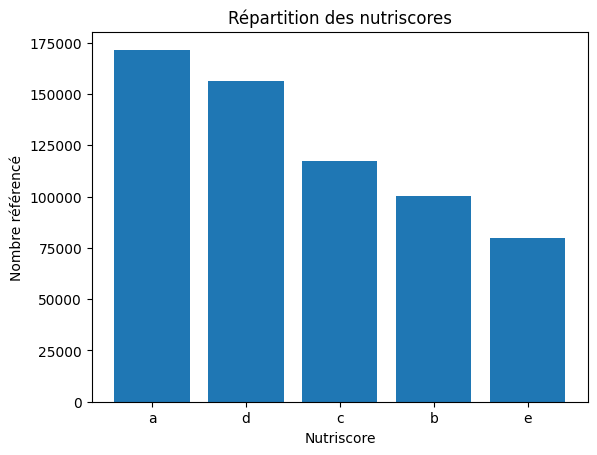

In [62]:
x = count_per_note.index
y = count_per_note

plt.bar(x, y)
plt.xlabel('Nutriscore')
plt.ylabel('Nombre référencé')
plt.title('Répartition des nutriscores')
plt.show()


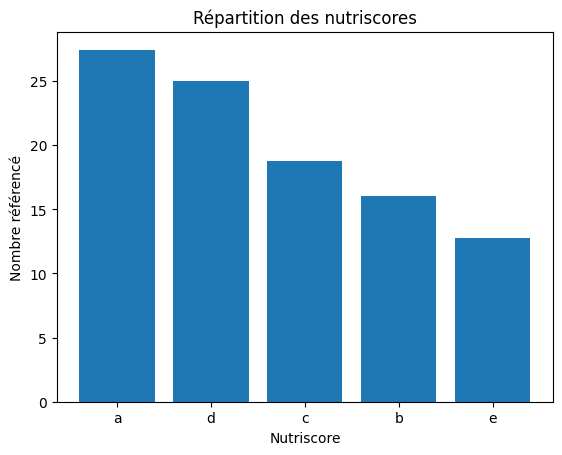

In [61]:
x = count_per_note.index
y = prop_nutri

plt.bar(x, y)
plt.xlabel('Nutriscore')
plt.ylabel('Nombre référencé')
plt.title('Répartition des nutriscores')
plt.show()


In [39]:
brands_with_nutriscore_a = envqualbio.loc[envqualbio['nutriscore_grade'] == 'a', 'brands_tags']
brands_counts = brands_with_nutriscore_a.value_counts()
brands_counts.sum()

171583

In [82]:
prop_nutri = (somme_nutri / count_pdt)*100
prop_nutri
print (prop_nutri,"% des produits recensés ont un nutriscore")

32.11659974092599 % des produits recensés ont un nutriscore


### Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ?



In [21]:
bioqual = pd.merge (bio, qual, on = ['product_name', 'brands_tags','serving_size'], how = 'outer', indicator = True)
bioqual

,product_name,brands_tags,serving_size,est_bio,code,quantity,countries_tags,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge
0,Skyr,danone,NaN,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
1,Skyr,danone,NaN,False,04319111,825 g,en:france,https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,fr:ferments-l...",NaN,NaN,0.2,NaN,3.9,10.0,0.09,0.0,both
2,Skyr,danone,NaN,False,1033097270864,4,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
3,Skyr,danone,NaN,False,3033490004744,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
4,Skyr,danone,NaN,False,2033496445756,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.09,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137063,Cailloux coeur chocolat,NaN,NaN,NaN,9999990060556,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,404.0,0.0,0.0,93.0,0.0,0.00,0.0,right_only
2137064,Cailloux Coeur Chocolat,NaN,NaN,NaN,9999990060563,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
2137065,Pastilles Menthe,NaN,NaN,NaN,9999990060600,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
2137066,Tartes saveur pommes,NaN,NaN,NaN,9999990415851,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,401.0,14.0,6.5,36.0,4.0,0.48,0.0,right_only


In [23]:
# Création de la table de contingence
X = 'est_bio'
Y = "nutriscore_grade"

cont = bioqual[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

nutriscore_grade,a,b,c,d,e,Total
est_bio,,,,,,
False,127134,76425,91503,123603,61314,479979
True,16001,8399,11235,13952,6881,56468
Total,143135,84824,102738,137555,68195,536447


In [24]:
# Regardons la distribution si les variables étaient complétement independantes

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(bioqual)
indep = round(tx.dot(ty) / n)

indep

nutriscore_grade,a,b,c,d,e,Total
est_bio,,,,,,
False,32148.0,19051.0,23075.0,30894.0,15316.0,120484.0
True,3782.0,2241.0,2715.0,3635.0,1802.0,14175.0
Total,35930.0,21293.0,25789.0,34529.0,17118.0,134659.0


In [25]:
# regardons où l'écart est le plus important
(cont - indep)/indep*100

nutriscore_grade,a,b,c,d,e,Total
est_bio,,,,,,
False,295.464726,301.160044,296.546046,300.087396,300.326456,298.375718
True,323.083025,274.788041,313.812155,283.823934,281.853496,298.363316
Total,298.371834,298.365660,298.379154,298.375279,298.381820,298.374412


In [26]:
chi2, p, dof, exp = chi2_contingency(cont)

In [27]:
chi2

153.3931386486948

In [28]:
p

7.463426065100196e-28

In [29]:
import seaborn as sns


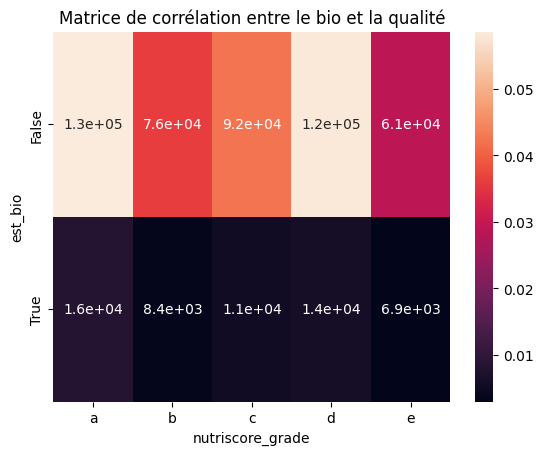

In [30]:
c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le bio et la qualité')
plt.show()